# NanoAODplus_analyzer

In [1]:
# uproot supports xrootd, but its nicer to have them local
#!mkdir -p data
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_500.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_501.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_502.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_503.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_504.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_505.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_506.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_507.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_508.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_509.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_510.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_511.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_512.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_513.root datasets/
#!xrdcp root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_514.root datasets/

In [2]:
import time

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np

from nanoAODplus_handler.AnalyzerProcessor import AnalyzerProcessor

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [3]:
tstart = time.time()    

'''fileset = {
    'Data10': [
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_500.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_501.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_502.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_503.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_504.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_505.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_506.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_507.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_508.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_509.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_510.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_511.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_512.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_513.root',
        'root://t2-cms-xrootd01.desy.de:1094//store/user/nujomhar/Data2010/CRAB_UserFiles/Data10MuOniaRunAtrigobj4/200301_205327/0000/Data10_Mu_trigobj4_514.root'

    ]
}'''

path = open("datasets/data2010_0000_path.txt")
files = path.read().splitlines()
files = files[0:80]

fileset = {'Data10': files}

output = processor.run_uproot_job(fileset,
                                  treename='Events',
                                  processor_instance=AnalyzerProcessor(),
                                  executor=processor.futures_executor,
                                  #executor_args={'workers': 6, 'flatten': True},
                                  executor_args={'workers': 8, 'flatten': True},
                                  chunksize=1000000000000,
                                 )

elapsed = time.time() - tstart
print(output)


{'mass': <Hist (dataset,mass) instance at 0x7fdee40a1b38>, 'pt': <Hist (dataset,pt) instance at 0x7fded1f2a748>, 'eta': <Hist (dataset,eta) instance at 0x7fded1f2ef28>, 'phi': <Hist (dataset,phi) instance at 0x7fded1f2e940>, 'cutflow': defaultdict(<class 'int'>, {'all events': 507037, 'all muons': 847352, 'soft muon': 499744, 'global muon': 294197, 'pt cut': 126445, 'eta cut': 125806, 'iso muon': 35052, 'valid vtx': 34927, 'two muons': 688, 'opposite charge': 580, 'same vtx': 570})}


/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(2.5, 12.5)

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


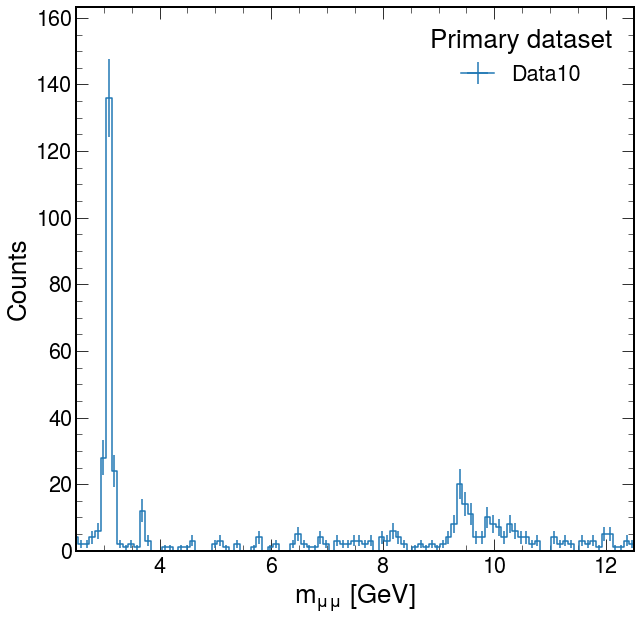

In [4]:
ax = hist.plot1d(output['mass'], overlay='dataset')
ax.set_xlim(2.5,12.5)

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


(0.0, 20.0)

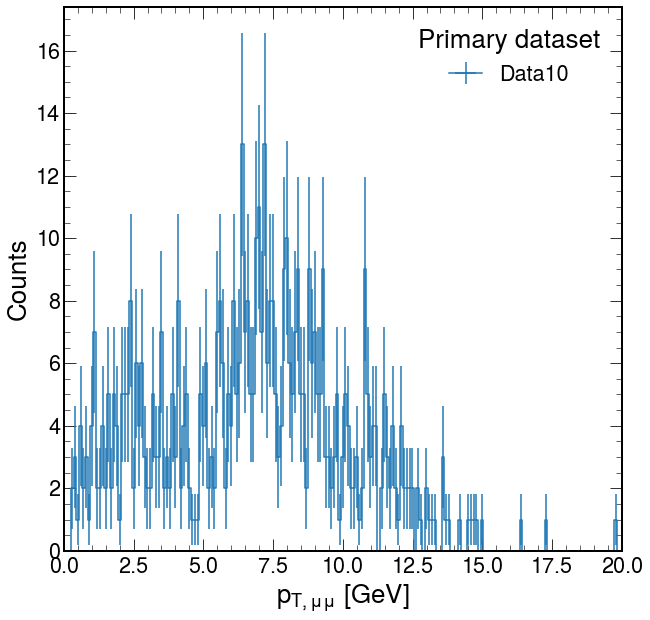

In [5]:
ax = hist.plot1d(output['pt'], overlay='dataset')
ax.set_xlim(0,20)

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


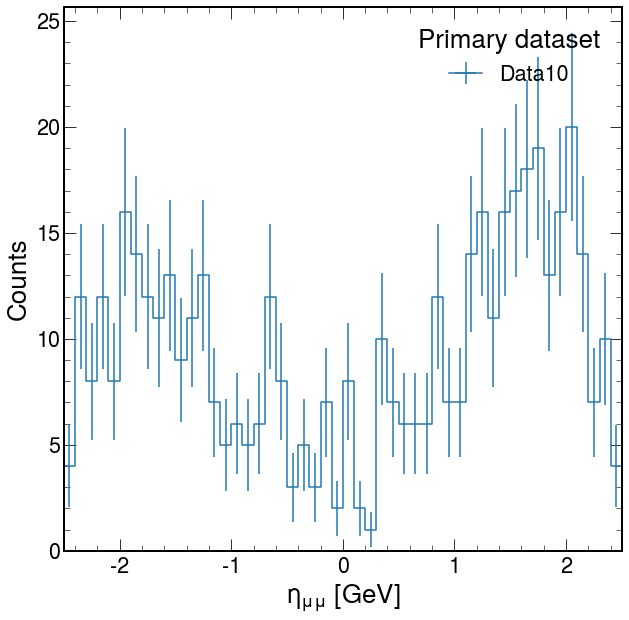

In [6]:
ax= hist.plot1d(output['eta'], overlay='dataset')

/afs/cern.ch/user/k/kmotaama/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.6/site-packages/mplhep/_deprecate.py:56: DeprecationWarning: kwarg "densitymode" in function "histplot" is deprecated and may be removed in future versions: "unit"mode is not useful
  return func(*args, **kwargs)


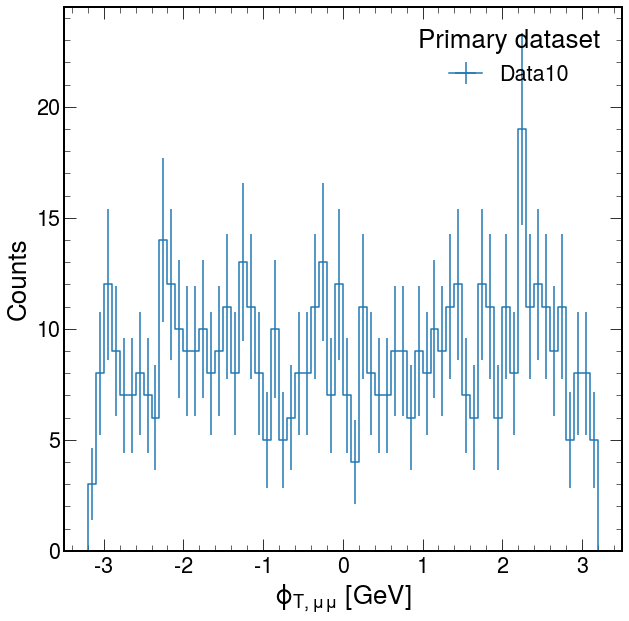

In [7]:
ax= hist.plot1d(output['phi'], overlay='dataset')

In [8]:
print("Events/s:", output['cutflow']['all events']/elapsed, "Time elapsed:", elapsed)
print(output['cutflow'])

Events/s: 19849.78722215016 Time elapsed: 25.543699502944946
defaultdict(<class 'int'>, {'all events': 507037, 'all muons': 847352, 'soft muon': 499744, 'global muon': 294197, 'pt cut': 126445, 'eta cut': 125806, 'iso muon': 35052, 'valid vtx': 34927, 'two muons': 688, 'opposite charge': 580, 'same vtx': 570})
